In [316]:
# PS01 - 3.2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Given information
M_0Ma = 33015 # Gton
pCO2_0Ma = 280 #ppmv
Fin_0Ma = 100  # Gton/kyr

# From Figure 3A - HSRs
HSR_0Ma = 24 # mm/yr
HSR_11Ma = 26
HSR_12Ma = 31  

# Calculate Fin at 12 Ma using Eqn 4
Fin_12Ma = 130

# From Figure 3B - pCO2 at 12 Ma
pCO2_12Ma = 300  

# Calculate M at 12 Ma from Eqn 2 
M_12Ma = 34147

# Calculate kw from steady state - 12 Ma
kw = 130/34147

# From Figure 3A: HSR drops from 31 to 26 between 12-11 Ma
Fin_11Ma = Fin_0Ma * (HSR_11Ma / HSR_0Ma)
print(f"Fin at 12 Ma = {Fin_12Ma} Gton/kyr")
print(f"Fin at 11 Ma = {Fin_11Ma:.2f} Gton/kyr")

# Predicited new steady state analytically
M_new_ss = Fin_11Ma / kw
pCO2_new_ss = (M_new_ss / M_0Ma)**2 * pCO2_0Ma
print(f"\nPredicted new steady state:")
print(f"  M_ss = {M_new_ss:.1f} Gton")
print(f"  pCO2_ss = {pCO2_new_ss:.1f} ppmv")
print()


# Model Setup
t_start = 0 # 12 Ma
t_end = 3000 # 9 Ma
dt = 1 # kyr
time = np.arange(t_start, t_end + dt, dt) # step from 12 Ma to 9 Ma
n_steps = len(time)

# For steady state: Fin is constant
Fin = np.ones(n_steps) * Fin_12Ma 
step_time = 1000 # step change when Fin drops
Fin[time >= step_time] = Fin_11Ma

# Initialize arrays
M = np.zeros(n_steps)
Fout = np.zeros(n_steps)

# Conditions at t=0 (12 Ma)
M[0] = M_12Ma
Fout[0] = kw * M[0]

# Run model 
for i in range(1, n_steps):
    # use mass balance eqn" dM/dt = Fin - Fout
    M[i] = M[i-1] + (Fin[i-1] - Fout[i-1]) * dt
    Fout[i] = kw * M[i] # kw remains constant

# Calculate pCO2 from eqn 2
pCO2 = (M/M_0Ma)**2 * pCO2_0Ma

# Net flux
net_flux = Fin - Fout

# Calculate Tau at 12 Ma - tau = M/Fin
tau = (34174/130)

# Create DataFrame
df = pd.DataFrame({
    'Time (kyr)': time,
    'Age (Ma)': 12 - time/1000, # Convert back to 12 Ma 
    'Fin (Gton/kyr)': Fin,
    'Fout (Gton/kyr)': Fout,
    'kw (kyr^-1)': kw,
    'M_O+A (Gton)': M,
    'pCO2_A (ppmv)': pCO2,
    'Fin-Fout (Gton/yr)': net_flux
})

# Results
print("Results:")
print("-"*30)
print("At t=0 (12 Ma) - before step change:")
print(f"  M = {M[0]:.1f} Gton")
print(f"  pCO2 = {pCO2[0]:.1f} ppmv")
print(f"  Fin = {Fin[0]:.4f}, Fout = {Fout[0]:.4f} (balanced)")

print(f"\nAt t={step_time} (11 Ma) - just after step change:")
print(f"  M = {M[step_time]:.1f} Gton (yet to respond)")
print(f"  Fin drops to {Fin[step_time]:.4f} Gton/kyr")
print(f"  Fout still = {Fout[step_time]:.4f} Gton/kyr")
print(f"  Net flux = {net_flux[step_time]:.3f} Gton/kyr (negative)")
print(f"  pCO2 = {pCO2[step_time]:.1f} ppmv (yet to respond)")

print(f"\nAt t={step_time+500} (10.5 Ma) - during shift:")
print(f"  M responds = {M[step_time+500]:.1f} Gton")
print(f"  Fin drops to {Fin[step_time+500]:.4f} Gton/kyr")
print(f"  Fout responds = {Fout[step_time+500]:.4f} Gton/kyr")
print(f"  Net flux = {net_flux[step_time+500]:.3f} Gton/kyr (negative, but reaching equilibrium)")
print(f"  We need {3 * tau:.1f} kyr to see 95% equilibrium reached")
print(f"  pCO2 responds = {pCO2[step_time+500]:.1f} ppmv")

print(f"\nAt t={t_end} (9 Ma) - final state:")
print(f"  M = {M[3000]:.1f} Gton (M has dropped)")
print(f"  pCO2 = {pCO2[3000]:.1f} ppmv (pCO2 has dropped)")
print(f"  Fin = {Fin[3000]:.4f}, Fout = {Fout[3000]:.4f}")
print(f"  Net flux = {net_flux[3000]:.4f} (approaching equilibrium)")
print()

ages = 12 - time/1000  # convert kyr since 12 Ma → absolute age (Ma)
time_11Ma = 12 - step_time/1000

# Plots: 
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1 - pCO2 vs time
axes[0].plot(ages, pCO2, 'r-', linewidth=1.5, label='pCO₂')
axes[0].axvline(x=time_11Ma, color='gray', linestyle=':', alpha=0.5, label='Step change (11 Ma)') # 11 Ma
axes[0].axvline(x=time_11Ma-0.8, color='green', linestyle=':', alpha=0.5, label='95% equilibrium') #tau * 3
axes[0].set_ylabel('pCO₂ (ppmv)', fontsize=12)
axes[0].set_title('Problem 3.2: Response to Step Change in Fin', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# Plot 2 - Net flux (Fin - Fout) vs time
axes[1].plot(ages, net_flux, 'purple', linewidth=2.5, label='Fin - Fout')
axes[1].axvline(x=12 - step_time/1000, color='gray', linestyle=':', alpha=0.5, label='Step change (11 Ma)') # 11 Ma
axes[1].axvline(x=time_11Ma-0.8, color='green', linestyle=':', alpha=0.5, label='95% equilibrium') #tau * 3
axes[1].set_xlabel('Age (Ma)', fontsize=12)
axes[1].set_ylabel('Fin - Fout (Gton/kyr)', fontsize=12)
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.savefig('3.2.pdf')
#plt.close()


# Answering Questions
print("\n" + "-"*60)
print("Does pCO2 change keep pace with changes to Fin?")
print("No - There is a significant lag.")
print(f"   - Fin drops instantly at 11 Ma")
print(f"   - pCO2 takes ~1200 kyr to reach 95% of new equilibrium and 4,000 kyr to assymptote.")
print(f"   - This lag is controlled by residence time τ = 400 kyr")
print("\n Why?")
print("The ocean+atmosphere carbon reservoir has intertia:")
print(f"   - Can't instantly remove ~{M_12Ma - M_new_ss:.0f} Gtons of carbon")
print(f"   - Fout = kw × M depends on M, which changes slowly")
print(f"   - System responds exponentially, not instantly")
print("\n What is the new steady-state pCO2?")
print(f" pCO2_ss = {pCO2_new_ss:.1f} ppmv")
print(f"   (Analytical: M_ss/kw = {Fin_11Ma}/{kw:.2e} = {M_new_ss:.0f} Gton)")
print(f"   Model final value: {pCO2[3000]:.1f} ppmv")
print("-"*60)


Fin at 12 Ma = 130 Gton/kyr
Fin at 11 Ma = 108.33 Gton/kyr

Predicted new steady state:
  M_ss = 28455.8 Gton
  pCO2_ss = 208.0 ppmv

Results:
------------------------------
At t=0 (12 Ma) - before step change:
  M = 34147.0 Gton
  pCO2 = 299.5 ppmv
  Fin = 130.0000, Fout = 130.0000 (balanced)

At t=1000 (11 Ma) - just after step change:
  M = 34147.0 Gton (yet to respond)
  Fin drops to 108.3333 Gton/kyr
  Fout still = 130.0000 Gton/kyr
  Net flux = -21.667 Gton/kyr (negative)
  pCO2 = 299.5 ppmv (yet to respond)

At t=1500 (10.5 Ma) - during shift:
  M responds = 29301.0 Gton
  Fin drops to 108.3333 Gton/kyr
  Fout responds = 111.5508 Gton/kyr
  Net flux = -3.218 Gton/kyr (negative, but reaching equilibrium)
  We need 788.6 kyr to see 95% equilibrium reached
  pCO2 responds = 220.5 ppmv

At t=3000 (9 Ma) - final state:
  M = 28458.6 Gton (M has dropped)
  pCO2 = 208.0 ppmv (pCO2 has dropped)
  Fin = 108.3333, Fout = 108.3439
  Net flux = -0.0105 (approaching equilibrium)


----------

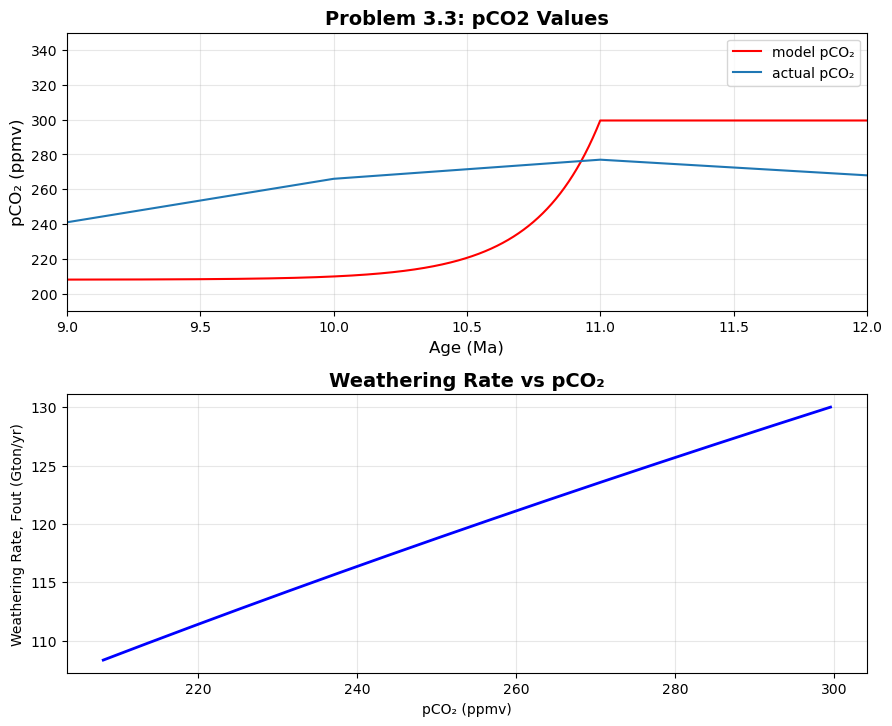

In [319]:
# PS01 - 3.3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Given information
M_0Ma = 33015 # Gton
pCO2_0Ma = 280 #ppmv
Fin_0Ma = 100  # Gton/kyr

# From Figure 3A - HSRs
HSR_0Ma = 24 # mm/yr
HSR_11Ma = 26
HSR_12Ma = 31  

# Calculate Fin at 12 Ma using Eqn 4
Fin_12Ma = 130

# From Figure 3B - pCO2 at 12 Ma
pCO2_12Ma = 300  

# Calculate M at 12 Ma from Eqn 2 
M_12Ma = 34147

# Calculate kw from steady state - 12 Ma
kw = 130/34147

# From Figure 3A - HSR drops from 31 to 26 between 12-11 Ma
Fin_11Ma = Fin_0Ma * (HSR_11Ma / HSR_0Ma)


# Predicited new steady state analytically
M_new_ss = Fin_11Ma / kw
pCO2_new_ss = (M_new_ss / M_0Ma)**2 * pCO2_0Ma


# Model Setup
t_start = 0 # 12 Ma
t_end = 3000 # 9 Ma
dt = 1 # kyr
time = np.arange(t_start, t_end + dt, dt) # step from 12 Ma to 9 Ma
n_steps = len(time)

# For steady state: Fin is constant
Fin = np.ones(n_steps) * Fin_12Ma 
step_time = 1000 # step change when Fin drops
Fin[time >= step_time] = Fin_11Ma

# Initialize arrays
M = np.zeros(n_steps)
Fout = np.zeros(n_steps)

# Conditions at t=0 (12 Ma)
M[0] = M_12Ma
Fout[0] = kw * M[0]

# Run model 
for i in range(1, n_steps):
    # use mass balance eqn dM/dt = Fin - Fout
    M[i] = M[i-1] + (Fin[i-1] - Fout[i-1]) * dt
    Fout[i] = kw * M[i] # kw remains constant

# Calculate pCO2 from eqn 2
pCO2 = (M/M_0Ma)**2 * pCO2_0Ma

# Net flux
net_flux = Fin - Fout

# Create DataFrame
df1 = pd.DataFrame({
    'Time (kyr)': time,
    'Age (Ma)': 12 - time/1000, # Convert back to 12 Ma 
    'Fin (Gton/kyr)': Fin,
    'Fout (Gton/kyr)': Fout,
    'kw (kyr^-1)': kw,
    'M_O+A (Gton)': M,
    'pCO2_A (ppmv)': pCO2,
    'Fin-Fout (Gton/yr)': net_flux
})

df2 = pd.read_csv('data.csv')

# Plots: 
ages = 12 - time/1000  # convert kyr since 12 Ma → absolute age (Ma)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# Plot 1 - pCO2 vs time
axes[0].plot(ages, pCO2, 'r-', linewidth=1.5, label='model pCO₂')
axes[0].plot((df2['Age']),df2['pCO2'], linewidth=1.5, label='actual pCO₂')
axes[0].set_xlabel('Age (Ma)', fontsize=12)
axes[0].set_ylabel('pCO₂ (ppmv)', fontsize=12)
axes[0].set_title('Problem 3.3: pCO2 Values', fontsize=14, fontweight='bold')
axes[0].set_xlim(9.0,12.0)
axes[0].set_ylim(190,350)
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)



# Plot weathering rate vs pCO2
axes[1].plot(pCO2, Fout, 'b-', linewidth=2)
axes[1].set_xlabel('pCO₂ (ppmv)')
axes[1].set_ylabel('Weathering Rate, Fout (Gton/yr)')
axes[1].set_title('Weathering Rate vs pCO₂', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)


fig.subplots_adjust(wspace=0.4, hspace=0.3, left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('3.3.pdf')
#plt.close()




Correlation between pCO2 and HSR: -0.167


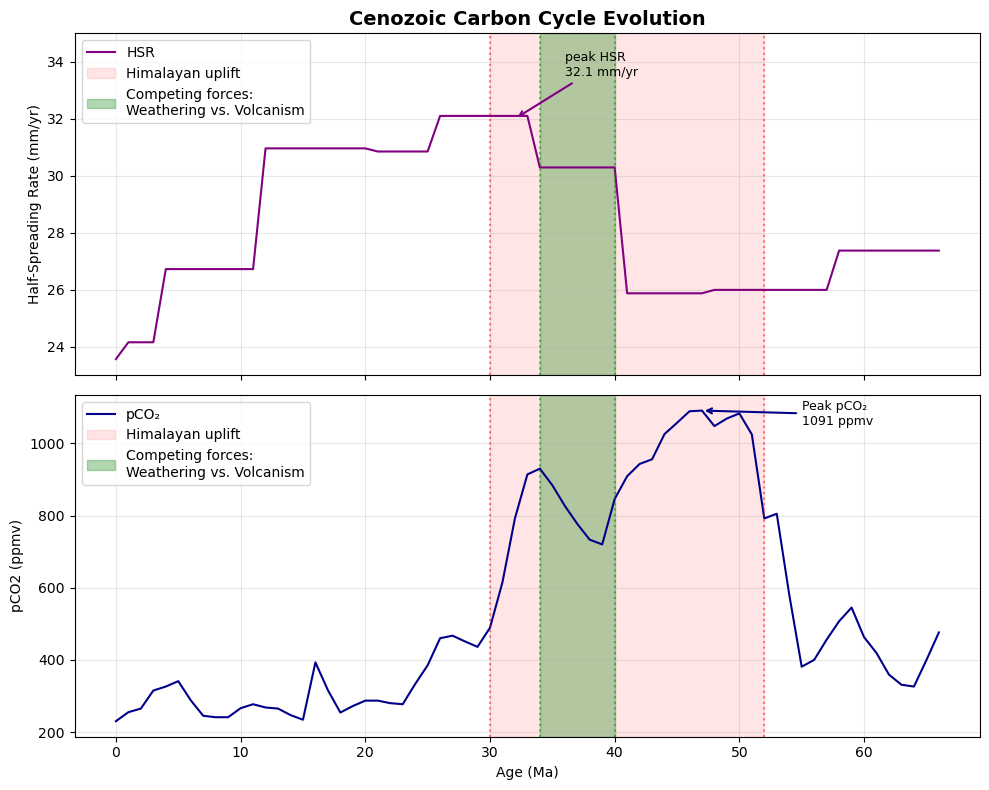

In [320]:
# PS01 - 3.4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Given information
M_0Ma = 33015 # Gton
pCO2_0Ma = 280 #ppmv
Fin_0Ma = 100  # Gton/kyr

# From Figure 3A - HSRs
HSR_0Ma = 24 # mm/yr
HSR_11Ma = 26
HSR_12Ma = 31  

# Calculate Fin at 12 Ma using Eqn 4
Fin_12Ma = 130

# From Figure 3B - pCO2 at 12 Ma
pCO2_12Ma = 300  

# Calculate M at 12 Ma from Eqn 2 
M_12Ma = 34147

# Calculate kw from steady state - 12 Ma
kw = 130/34147

# From Figure 3A: HSR drops from 31 to 26 between 12-11 Ma
Fin_11Ma = Fin_0Ma * (HSR_11Ma / HSR_0Ma)


# Predicited new steady state analytically
M_new_ss = Fin_11Ma / kw
pCO2_new_ss = (M_new_ss / M_0Ma)**2 * pCO2_0Ma


# Model Setup
t_start = 0 # 12 Ma
t_end = 3000 # 9 Ma
dt = 1 # kyr
time = np.arange(t_start, t_end + dt, dt) # step from 12 Ma to 9 Ma
n_steps = len(time)

# For steady state: Fin is constant
Fin = np.ones(n_steps) * Fin_12Ma 
step_time = 1000 # step change when Fin drops
Fin[time >= step_time] = Fin_11Ma

# Initialize arrays
M = np.zeros(n_steps)
Fout = np.zeros(n_steps)

# Conditions at t=0 (12 Ma)
M[0] = M_12Ma
Fout[0] = kw * M[0]

# Run model 
for i in range(1, n_steps):
    # use mass balance eqn dM/dt = Fin - Fout
    M[i] = M[i-1] + (Fin[i-1] - Fout[i-1]) * dt
    Fout[i] = kw * M[i] # kw remains constant

# Calculate pCO2 from eqn 2
pCO2 = (M/M_0Ma)**2 * pCO2_0Ma

# Net flux
net_flux = Fin - Fout

# Create DataFrame
df1 = pd.DataFrame({
    'Time (kyr)': time,
    'Age (Ma)': 12 - time/1000, # Convert back to 12 Ma 
    'Fin (Gton/kyr)': Fin,
    'Fout (Gton/kyr)': Fout,
    'kw (kyr^-1)': kw,
    'M_O+A (Gton)': M,
    'pCO2_A (ppmv)': pCO2,
    'Fin-Fout (Gton/yr)': net_flux
})

df2 = pd.read_csv('data.csv')

ages = 12 - time/1000  # convert kyr since 12 Ma -> absolute age (Ma)

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Panel A: Spreading Rate
axes[0].plot(df2['Age'], df2['Mean Length-Averaged Half Spreading Rate (mm/yr)'],'-',c='purple', label='HSR')
axes[0].set_ylabel('Half-Spreading Rate (mm/yr)')
axes[0].set_title('Cenozoic Carbon Cycle Evolution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(23,35)


# Panel B: pCO2 
axes[1].plot(df2['Age'], df2['pCO2'], '-', label='pCO₂', c='darkblue')
axes[1].set_ylabel('pCO2 (ppmv)')
axes[1].set_xlabel('Age (Ma)')
axes[1].grid(True,alpha=0.3)

# Add spans for key events
for ax in axes:
    ax.axvline(x=52, color='r', linestyle=':', alpha=0.5,) # Himalayan orogeny begins
    ax.axvline(x=30, color='r', linestyle=':', alpha=0.5,) # Himalayan orogeny ends
    ax.axvspan(52, 30, alpha=0.1, color='red', label='Himalayan uplift')
    ax.axvline(x=40, color='green', linestyle=':', alpha=0.5,) # competing begins
    ax.axvline(x=34, color='green', linestyle=':', alpha=0.5,) # competing ends
    ax.axvspan(40, 34, alpha=0.3, color='green', label='Competing forces:\nWeathering vs. Volcanism') # Display peak spreading
    

# Add text annotations for key events
axes[0].annotate('peak HSR\n32.1 mm/yr', xy=(32, 32), xytext=(36, 33.5),
                fontsize=9, ha='left',
                arrowprops=dict(arrowstyle='->', color='purple', lw=1.5))
axes[1].annotate('Peak pCO₂\n1091 ppmv', xy=(47, 1091), xytext=(55, 1050),
                fontsize=9, ha='left',
                arrowprops=dict(arrowstyle='->', color='darkblue', lw=1.5))

r = np.corrcoef(df2['pCO2'], df2['Mean Length-Averaged Half Spreading Rate (mm/yr)'])[0,1]
print(f"\nCorrelation between pCO2 and HSR: {r:.3f}") # Doesn't really tells use much due to intertial effects

# Add legends 
axes[0].legend(loc='upper left', fontsize=10)
axes[1].legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('3.4.pdf', dpi=300, bbox_inches='tight')
#plt.close()



Correlation between pCO2 modeled temperature and d18O modeled temperature: 0.557


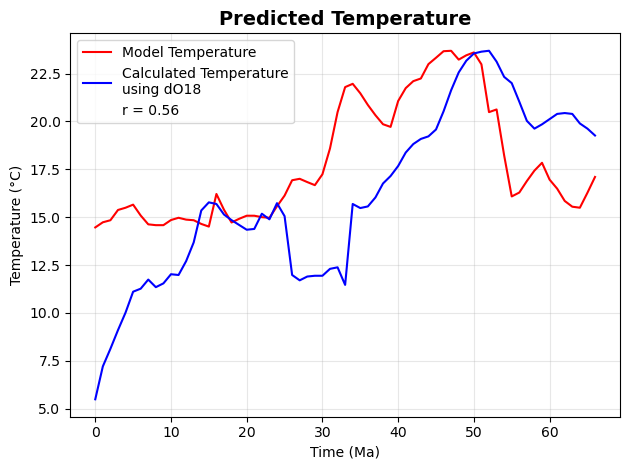

In [288]:
# PS01 - 4.1.2

# Model Setup
t_start = 0 # 12 Ma
t_end = 3000 # 9 Ma
dt = 1 # kyr
time = np.arange(t_start, t_end + dt, dt) # step from 12 Ma to 9 Ma
n_steps = len(df2['Age'])
T_initial = 15
pCO2_ref = 280

T = np.zeros(n_steps)  # Create array to store temperature values

# Run equations 
for i in range(n_steps): 
    T[i] = T_initial + 3 * ((df2['pCO2'][i])/pCO2_ref-1)
# d18O_w is a constant - toy around to see what works
T_data = 16.5 - 4.3*(df2['d18O of Benthic Foraminifera (per mil)']-1.5)+0.14*((df2['d18O of Benthic Foraminifera (per mil)']-1.5)**2)

# Calculate coefficient
r = np.corrcoef(T, T_data)[0,1]
print(f"\nCorrelation between pCO2 modeled temperature and d18O modeled temperature: {np.corrcoef(T, T_data)[0,1]:.3f}")

#plot
plt.figsize=(8,10)
plt.plot(df2['Age'], T, '-', c='r', label='Model Temperature')
plt.plot(df2['Age'], T_data, c='b', label='Calculated Temperature\nusing dO18')
plt.plot([], [], ' ', label=f'r = {r:.2f}')
plt.xlabel('Time (Ma)')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha =0.3)
plt.title('Predicted Temperature', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('4.1.pdf', dpi=300, bbox_inches='tight')
#plt.close()
